## PS3-5 K-means for compression

#### (a) K-Means Compression Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
from matplotlib.image import imread

1.20.2


In [2]:
def init_centroids(X, k):
    """Initialize centroids by randomly choosing pixels in the image.

    :param X: The flattened image matrix. Shape (l * m, n). e.g. for a 128 by 128 image, the shape would be (128*128, 3).
    :param k: The number of clusters.
    :return:  An numpy array of centroids. Shape (k, n).
    """
    return np.random.default_rng().choice(X, k, replace=False)

In [3]:
def assign_clusters(X, mu):
    """Assign each pixel to the closest cluster.

    :param X:  The flattened image matrix. Shape (a, b). e.g. for a 128 by 128 image, the shape would be (128*128, 3).
    :param mu: The centroids. Shape (k, b), where k is the number of clusters, b = 3.
    :return:   An numpy array with labels representing the corresponding clusters. Shape (a,).
    """

    a, b = X.shape

    # Compute the 2d norm between a pixel and each centroid. Shape (a, k)
    norms = np.linalg.norm(X.reshape((a, 1, b)) - mu, ord=2, axis=2)

    return np.argmin(norms, axis=1)

In [4]:
def update_centroids(X, labels, k):
    """Update centroids.

    :param X:      The flattened image matrix. Shape (a, b). e.g. for a 128 by 128 image, the shape would be (128*128, 3).
    :param labels: The labels of the pixels. Shape (a,).
    :return:       The updated centroids. Shape (k, b).
    """

    a, b = X.shape

    # For each element in `labels`, replace it with an 1d array that indicates the cluster by 0's and 1. Shape (a, k)
    # e.g. [0, 0, 1, 0, ..., 0] stands for label 2
    indicator_matrix = (labels.reshape((a, 1)) == np.arange(k)).astype(int)

    centroids = indicator_matrix.T @ X / indicator_matrix.sum(axis=0).reshape((k, 1))#(k, b)
    return centroids.astype(int)

In [5]:
def compress_image(img, k=16):
    _, _, n = img.shape
    X = img.reshape((-1, n))

    mu = init_centroids(X, k)
    labels = assign_clusters(X, mu)

    it = 0
    converged = False
    min_iter = 30
    max_iter = 2000
    while it < min_iter or (it < max_iter and not converged):
        old_labels = labels
        labels = assign_clusters(X, mu)#(a,)
        mu = update_centroids(X, labels, k)#(k,b)

        it += 1
        converged = np.all(old_labels == labels)

    return mu, labels

The small image was somehow failed to be loaded, so we compressed the large image instead.

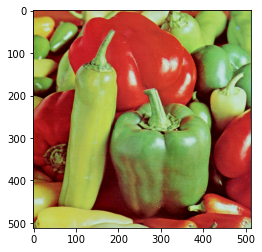

In [6]:
img_large = imread('data/peppers-large.tiff')
plt.imshow(img_large)

In [7]:
img_small = imread('data/peppers-small.tiff')
plt.imshow(img_small)

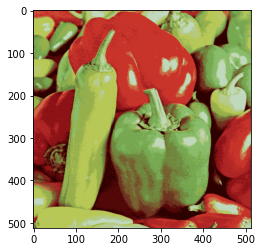

In [22]:
mu, labels = compress_image(img_large, k=16)
plt.imshow(mu[labels].reshape(img_large.shape))

#### (b) Compression Factor

By using binary encoding, representing the image with 16 colors needs $\log_2 16 = 4$ bits. Therefore, comparing with
the original 24 bits, the factor that the image was compressed is 6.